In [ ]:
'''

Project Title: Stock Price Analysis for - [NVDA, AMZN, AAPL, AMD, FB]

Project Members :
      1. Nidhi Thakur - (Role: Programmer Analyst - BA)
      2. George N. - (Role: Project Specialist)
      3. Vaibhav Jain - (Role: Programmer Analyst)
      4. Jasgeet Kaur - (Role: Programmer Analyst)
      5. Pooja Ayre - (Role: Project Architect; Project POC)

Course_Code : AIDI_1100
Submission_Date : 13 December,2021
===============================

Project Description : 
--------------------------------
  The project will scan, scrape and store the news webiste data in a CSV format. Yahoo Finance API will then retrieve the historic stock price and volume for last 60 days. Using visualation, we will the stock price and volume
  for different stocks and recommend whether or not selected stock is worth buying.

================================

Requirements Parameters- 
--------------------------------
  1. Scan/Parse news from - https://www.prnewswire.com/news-releases/news-releases-list/
  2. Track news data content real-time to find  stock symbol for a specific company(s)
  3. Yahoo Finance API to pull historic data for selected symbol.
  4. Visualise data for past 60 days wrt to closed price and volume of selected stock symbol.
  5. Recommend whether to buy stock or not (Optional)

================================

STEP WISE FLOW OF THE CODE -  

     STEP I:  Required Packaage Installations

    STEP II:  Importing neccessary libraries

    STEP III: Neccesary links to website and storing it in a variable

    STEP IV:  Scan & Parse
                      This section scan and parse news from a given wesbite link using beautifulsoup library of python.

     STEP V:  Track , Store , Search and Extract
                      This section track and store parsed news and extract symbol data using fuzzywuzzy library of python.

    STEP VI:  Pull Historic data for selected stock symbols
                      This section pulls the historic stock data for selected symbols using one of the popular python's yahoo finance library. 

    STEP VII: Visualisations for selected stock symbols
                      This section will plot time series graphs using assorted python libraries to show the trend of last 60 days wrt to stock price and volume.

    STEP VIII: Summary and Recommendation
                      This section will help recommend whether or not stock is worth buying based on closed price and volume.

================================

FUTURE SCOPE -

    1. There will be a dynamic selection of stock symbol by the user to populate the recommendation based on historic data.
    2. The code will be tailored to handle scenarios such as null data, internationalisation and date formats efficiently.
    3. Prediction on stock price can be anticipated using historic data.

'''

# **REQUIRED PACKAGE INSTALLATIONS**

In [13]:
!pip install yfinance --upgrade --no-cache-dir #used for pulling historic data for selected stock symbols
!pip install requests-cache 
!pip install fuzzywuzzy #Used for String Matching

# **Necessary LIBRARIES**

In [14]:
# Import necessary libraries for web scraping
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import requests
import pandas as pd

#Libraries for symbol extraction
import re
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

#Importing this module to pull historic data of stock symbols
import yfinance as yf

#Importing libraries to plot visualisations
import matplotlib.pyplot as plt
import datetime
import numpy as np


/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# **Necessary links to website**

In [15]:
# Create variables equal to the links to the website we want to parse

# This is the link to the main hompage
root = 'https://www.prnewswire.com'

# This is the link to the current news (comment this out if you don't want to parse current news) = DYNAMIC LINK
# link = 'https://www.prnewswire.com/news-releases/news-releases-list/?pagesize=100&page='

# This is the link to past news articles given by specific month/day/year (comment this out if you don't want to parse old news articles) = STATIC LINK
link = 'https://www.prnewswire.com/news-releases/news-releases-list/?month=11&day=11&year=2021&hour=00&pagesize=100&page='

# Testing to see if links work
req = Request(link, headers={'user-agent':'my-app'})
webpage = urlopen(req).read()


# **Coding Section 1: SCAN & PARSE with Coding Section 2: STORING**
(George and Nidhi)

In [16]:
# Function to parse and save past news articles within a desired page limit (note maximum pages to call is 100)
def old_news(old_link, pages):
    # Loop over desired number of pages, by appending given page number to the link above
    for i in range(1,pages):
      link=old_link+str(i)
      req = Request(link, headers={'user-agent':'my-app'})
      webpage = urlopen(req).read()
      # Using BeautifulSoup to make link readable    
      with requests.Session() as c:
        soup = BeautifulSoup(webpage, 'lxml')
        
        # Looped Parsing webpage for each individual news article
        for item in soup.find_all('div', class_="row arabiclistingcards"):
          news_link = root + item.find('a', href=True)['href'] # adding 'href' of each article to "root" url to get link to respective article
          # retrieve and clean up news article title text
          title = item.find('h3').get_text()
          news_title = title.splitlines()
          del news_title[0]
          news_title[0] = news_title[0].split(',')
          news_title[1] = news_title[1].replace(',','')
          dateTime = news_title[0]
          date = dateTime[0]
          year = dateTime[1]
          time = dateTime[2]
          # retrieve and clean up news article description text
          des = item.find('p', class_="remove-outline").get_text()
          des = des.replace(',','')

          # Create and save each item into a .csv file in Google VM
          news_data = open('s1data.csv', 'a')
          # Function to save only the news articles with desired word(s) in the article description
          def filter(text, a):
            if text in a:
              return news_data.write('{},{},{},{},{} \n'.format(date, time, news_title[1], news_link, des))
          filter('(NYSE:', des)
          filter('(NASDAQ:', des)
          news_data.close()
# Call function passing in past news link and max pages (note: this function will not work for DYNAMIC LINK)
old_news(link, 100)

# **Coding Section 2: TRACK, STORE, SEARCH & EXTRACT**
(George and Nidhi)

In [17]:
# Function with similar aspects as "old_news" function, with minor adjustments for DYNAMIC LINK
def news(old_link, pages):
  for i in range(1,pages):
    link=old_link+str(i)
    req = Request(link, headers={'user-agent':'my-app'})
    webpage = urlopen(req).read()
    
    with requests.Session() as c:
      soup = BeautifulSoup(webpage, 'lxml')
      
      # Parsing webpage for each individual news article
      for item in soup.find_all('div', class_="row arabiclistingcards"):
        news_link = root + item.find('a', href=True)['href'] # adding 'href' of each article to root url to get link to respective article

        title = item.find('h3').get_text()
        news_title = title.splitlines()
        del news_title[0]
        news_title[0] = news_title[0].split(',')
        news_title[1] = news_title[1].replace(',','')
        dateTime = news_title[0]
        des = item.find('p', class_="remove-outline").get_text()
        des = des.replace(',','')

        # Saves current news data under a different .csv file from Section 1
        news_data = open('data.csv', 'a')
        def filter(text, a):
          if text in a:
            return news_data.write('{},{},{} \n'.format(news_title[1], news_link, des))
        filter('(NYSE:', des)
        filter('(NASDAQ:', des)
        news_data.close()

# Best to call this function, only when getting the current news articles (note: must comment out STATIC LINK and uncomment DYNAMIC LINK)
news(link, 100)



In [18]:
# Converting .csv file in Google VM to pandas DATAFRAME
df = pd.read_csv('data.csv',header=None)
col_names = ['news_title', 'news_link', 'news_description']
df.columns = col_names
print(df.head())


                                          news_title  ...                                   news_description
0  Ademi LLP Investigates Claims of Securities Fr...  ...  Ademi LLP is investigating possible securities...
1  Richard Fain démissionne de son poste de PDG d...  ...  Le Royal Caribbean Group (NYSE: RCL) a annoncé...
2  Ever-Glory To Report Third Quarter 2021 Earnin...  ...  Ever-Glory International Group Inc. (the "Comp...
3  CSI Compressco LP Announces A Series Of Transa...  ...  CSI Compressco LP (NASDAQ: CCLP) ("CSI" or "Pa...
4  Richard Fain deixa o cargo de CEO do Royal Car...  ...  Richard Fain cujas inovações durante mais de 3...

[5 rows x 3 columns]


**SYMBOL EXTRACTION**

In [19]:
'''
CODING SECTION - 2 : SYMBOL EXTRACTION (George and Nidhi)

'''
# Creating a list of Symbols and names of the company's to be extracted
Symbols = ('nvda','amzn','aapl','amd','fb')
Names = ('NVIDIA Corp','Amazon','Apple','Advanced Micro Devices','facebook')
# defining an extraction function with string parameter
def ExtractSymbol(title):
    final = ""
    df_matchedSym = []
    matchedSymList = ""
    # checking if symbols are directly referenced in the news description
    for i in range(0, len(Symbols)):
        sym = Symbols[i].lower()
        st=title.lower()
        temp = []
        # matching the symbols using regular expression
        reg = r"\b"+sym+r"\b"
        reg = re.compile(reg)
        # Appending the found symbols 
        if(reg.search(st)):
            temp.append(Symbols[i])
            temp.append(Names[i])
            temp.append(True)
        else:
            temp.append(Symbols[i])
            temp.append(Names[i])
            temp.append(False)
        df_matchedSym.append(temp)
    # printing the found symbol
    df_matchedSym = [z for z in df_matchedSym if z[2] == True]
    if df_matchedSym:
        for term in df_matchedSym:
            matchedSymList = matchedSymList+"|"+term[0]
    df_matchedSym = []
    
    # Using fuzzy string matching to identify the companies mentioned in the news description by names
    # fuzzy string matching  used to compare strings that were referring to the same company, 
    # but they were written slightly different
    temp2 = re.sub('[^A-Za-z0-9. ]+', '', title)
    for i in range(0, len(Names)):
        thres=50 #assigning a threshold
        tsor = fuzz.token_sort_ratio(temp2.lower(), Names[i].lower())#taking token_sort ratio
        tser = fuzz.token_set_ratio(temp2.lower(), Names[i].lower())#taking token_set ratio
        r = fuzz.ratio(temp2.lower(), Names[i].lower())#taking direct ratio
        pr = fuzz.partial_ratio(temp2.lower(), Names[i].lower())#taking partial ratio
        avg = (tsor+tser+r+pr)/4 #taking average of the ratios
        temp = []
        if(avg >= thres): #comparing the average with the threshold value
            temp.append(Symbols[i])
            temp.append(Names[i])
            temp.append(True)
        else:
            temp.append(Symbols[i])
            temp.append(Names[i])
            temp.append(False)
        df_matchedSym.append(temp)#appending found results
    
    # verifying results of fuzzy string matching
    # when duplicate results are extracted ie. if in a description both symbol and name is mentioned, the duplicacy is handled here
    df_matchedSym = [z for z in df_matchedSym if z[2] == True]
    if(len(df_matchedSym) == 0): #checking for matched symbols
        if(matchedSymList == ""):
            final = ""
        else:
            final = final+matchedSymList
    else:#handles the name and symbol duplicacy
        for i in range(0, len(df_matchedSym)): 
            reg = r"\b"+df_matchedSym[i][0].lower()+r"\b" #rematching using regular expression
            reg = re.compile(reg)
            if(reg.search(matchedSymList.lower())):
                continue #ending the search when duplicacy found
            symSplit = df_matchedSym[i][1].split(" ")
            reg = r"\b"+symSplit[0].lower()+r"\b"#preferencing symbols over names
            reg = re.compile(reg) 
            if(reg.search(temp2.lower())): 
                if(len(symSplit) < 3): #checking for the total list values
                    matchedSymList = matchedSymList+"|"+df_matchedSym[i][0]
                else:
                    # storing the final result
                    reg = r"\b"+symSplit[1].lower()
                    reg = re.compile(reg)
                    if(reg.search(temp2.lower())):
                        matchedSymList = matchedSymList+"|"+df_matchedSym[i][0]
        final = final+matchedSymList
    return final #returning the end extracted symbols
    
def conv(df):
  for items in df:
    new_list = list(df)

    return new_list

# calling the function with news_title column as parameter
new_list = conv(df['news_description'])
# used to send the object type news description column as individual parameters
for i in new_list:
 symbol = ExtractSymbol(i)
 if symbol.strip() != "":
   print(symbol) #printing the final result




|amzn
|amzn
|fb
|amzn
|amzn
|amzn
|fb
|amzn


# **Coding Section 3: PULL HISTORIC DATA FOR SELECTED STOCK SYMBOLS**
(Added_By Pooja A - 25 November,2021)

In [20]:
'''
CODING SECTION - 3 : PREDICT STOCK PRICE TREND THROUGH YAHOO FINANCE API - (# Added_By Pooja A - 25 November,2021)

'''
# create ticker object for each stock symbol
nvda = yf.Ticker('nvda')
amzn =  yf.Ticker('amzn')
aapl =  yf.Ticker('aapl')
amd =  yf.Ticker('amd') 
fb =  yf.Ticker('fb') 

# get stock info for respective stock symbol
print(nvda.info)
print(amzn.info)
print(aapl.info)
print(amd.info)
print(fb.info)

# get historical market data for last 60 days using history method of yfinance library
nvda_hist = nvda.history(period="60d")
amzn_hist = amzn.history(period="60d")
aapl_hist = aapl.history(period="60d")
amd_hist = amd.history(period="60d")
fb_hist = fb.history(period="60d")

# Adding additional column in each dataframe with its respective stock name
df_nvda = pd.DataFrame(nvda_hist)
df_nvda['stock name'] = 'nvda'
df_amzn = pd.DataFrame(amzn_hist)
df_amzn['stock name'] = 'amzn'
df_aapl = pd.DataFrame(aapl_hist)
df_aapl['stock name'] = 'aapl'
df_amd = pd.DataFrame(amd_hist)
df_amd['stock name'] = 'amd'
df_fb = pd.DataFrame(fb_hist)
df_fb['stock name'] = 'fb'

#concatenating all the dataframes as one for further analysis
df_stock_data = pd.concat([df_amzn,df_aapl,df_nvda,df_amd,df_fb])

#printing the concatenated dataframe for visual
df_stock_data

{'zip': '95051', 'sector': 'Technology', 'fullTimeEmployees': 18975, 'longBusinessSummary': "NVIDIA Corporation operates as a visual computing company worldwide. It operates in two segments, Graphics and Compute & Networking. The Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and related infrastructure, and solutions for gaming platforms; Quadro/NVIDIA RTX GPUs for enterprise design; GRID software for cloud-based visual and virtual computing; and automotive platforms for infotainment systems. The Compute & Networking segment offers Data Center platforms and systems for AI, HPC, and accelerated computing; Mellanox networking and interconnect solutions; automotive AI Cockpit, autonomous driving development agreements, and autonomous vehicle solutions; and Jetson for robotics and other embedded platforms. The company's products are used in gaming, professional visualization, datacenter, and automotive markets. NVIDIA Corporation sells its p

,Open,High,Low,Close,Volume,Dividends,Stock Splits,stock name
Date,,,,,,,,
2021-09-20,3396.000000,3419.000000,3305.010010,3355.729980,4669130,0.0,0,amzn
2021-09-21,3375.000000,3379.699951,3332.389893,3343.629883,2780878,0.0,0,amzn
2021-09-22,3351.000000,3389.000000,3341.050049,3380.050049,2411403,0.0,0,amzn
2021-09-23,3380.050049,3428.959961,3380.050049,3416.000000,2379414,0.0,0,amzn
2021-09-24,3402.010010,3429.260010,3393.399902,3425.520020,2116241,0.0,0,amzn
...,...,...,...,...,...,...,...,...
2021-12-07,321.570007,326.540009,321.000000,322.809998,18794000,0.0,0,fb
2021-12-08,325.000000,332.750000,323.070007,330.559998,19937700,0.0,0,fb
2021-12-09,329.540009,336.130005,328.000000,329.820007,16879200,0.0,0,fb


# **Coding Section 4: VISUALISATION**
(Jasgeet and Vaibhav)

In [21]:
df_nvda.reset_index(level=0, inplace=True)
df_amzn.reset_index(level=0, inplace=True)
df_aapl.reset_index(level=0, inplace=True)
df_amd.reset_index(level=0, inplace=True)
df_fb.reset_index(level=0, inplace=True)

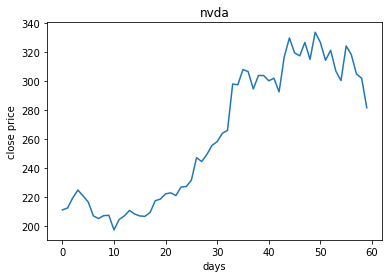

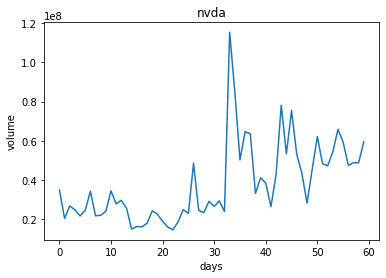

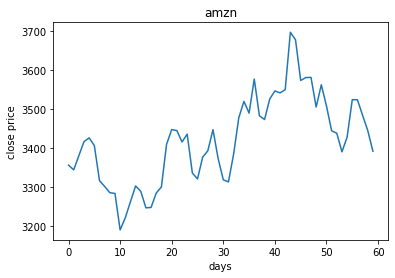

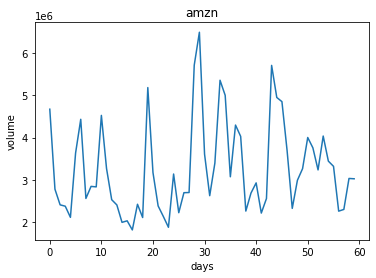

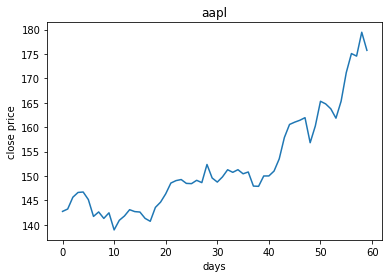

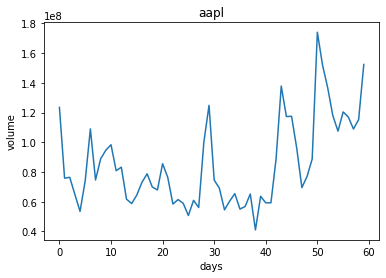

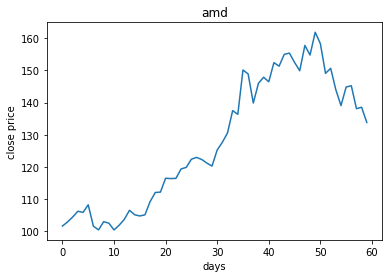

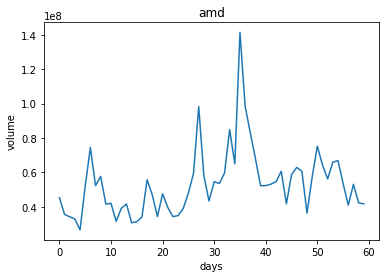

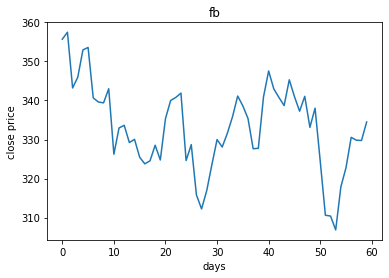

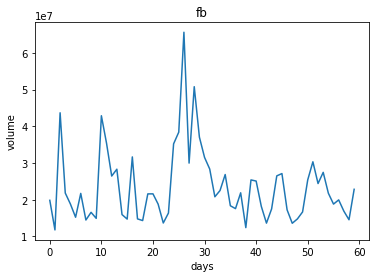

In [22]:
plt.plot(np.array(df_nvda.index),df_nvda['Close'])
plt.title("nvda")
plt.xlabel("days")
plt.ylabel("close price")
plt.show()


plt.plot(np.array(df_nvda.index),df_nvda['Volume'])
plt.title("nvda")
plt.xlabel("days")
plt.ylabel("volume")
plt.show()

plt.plot(np.array(df_amzn.index),df_amzn['Close'])
plt.title("amzn")
plt.xlabel("days")
plt.ylabel("close price")
plt.show()

plt.plot(np.array(df_amzn.index),df_amzn['Volume'])
plt.title("amzn")
plt.xlabel("days")
plt.ylabel("volume")
plt.show()

plt.plot(np.array(df_aapl.index),df_aapl['Close'])
plt.title("aapl")
plt.xlabel("days")
plt.ylabel("close price")
plt.show()

plt.plot(np.array(df_aapl.index),df_aapl['Volume'])
plt.title("aapl")
plt.xlabel("days")
plt.ylabel("volume")
plt.show()

plt.plot(np.array(df_amd.index),df_amd['Close'])
plt.title("amd")
plt.xlabel("days")
plt.ylabel("close price")
plt.show()

plt.plot(np.array(df_amd.index),df_amd['Volume'])
plt.title("amd")
plt.xlabel("days")
plt.ylabel("volume")
plt.show()

plt.plot(np.array(df_fb.index),df_fb['Close'])
plt.title("fb")
plt.xlabel("days")
plt.ylabel("close price")
plt.show()

plt.plot(np.array(df_fb.index),df_fb['Volume'])
plt.title("fb")
plt.xlabel("days")
plt.ylabel("volume")
plt.show()

# **Coding Section 5 (BONUS): SUMMARY & RECOMMENDATION**
(Jasgeet & Vaibhav)

In [23]:
''' trenddetector, a user defined function where we are making use of very intuitive pre-defined function under numpy module, named "polyfit".
Think of it as a regression algorithm where it tries to come up with a polynomial curve, be it linear, or higher degree polynomial curve based on the "order" parameter of polyfit.

So, In our scenario it is giving us a linear curve trend line of the stock based on the last 60 day prices and finds the slope of that curve and returns it. '''

def trenddetector(list_of_index, array_of_data, order=1):
    result = np.polyfit(list_of_index, list(array_of_data), order) 
    slope = result[-2]
    return float(slope)

In [24]:
# for AMD:

''' Calling the trenddetector function here, using the close price of AMD to find the slope of the trend line based on 60 day close price of AMD.
Based on the nature of slope, we will be providing the recommendations, if slope is positive that means it's a rising trend and the function would recommend to "BUY STOCK!",
if it's negative, that means it is a downward trend and recommend to "NOT BUY STOCK!" 
and if the slope is 0 that means the trend is fluctuating, we need to 'WAIT BEFORE BUYING STOCK!' '''

close = list(df_amd['Close'])

trend = trenddetector(df_amd.index,  close)
print(trend)

if trend > 0:
  print('BUY STOCK!')
elif trend < 0:
  print('NOT BUY STOCK!')
elif trend == 0:
  print('WAIT BEFORE BUYING STOCK!')

1.030021414368574
BUY STOCK!
